<a href="https://colab.research.google.com/github/aabhiyann/audio-classification-cnn/blob/main/notebooks%20/01_explore_audio_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import fnmatch

directory_path = '/content/Cat/'

# List all files and directories in the specified path
all_files = os.listdir(directory_path)

# Filter the list to include only .wav files
wav_files = fnmatch.filter(all_files, '*.wav')

print(f"Found {len(wav_files)} WAV files:")
for wav_file in wav_files[:10]:  # Print first 10 for brevity
    print(wav_file)

Found 207 WAV files:
409c962a_nohash_0.wav
84bf12ff_nohash_0.wav
1ffd513b_nohash_1.wav
ead2934a_nohash_1.wav
981e2a16_nohash_0.wav
57b68383_nohash_0.wav
9c06a3f3_nohash_0.wav
e53139ad_nohash_0.wav
66aa0f29_nohash_0.wav
11860c84_nohash_0.wav


## Load a sample audio file

### Subtask:
Load one of the .wav files to inspect its properties (e.g., sample rate, duration).


**Reasoning**:
To load and inspect the properties of a sample audio file, I will use the `librosa` library to load the first `.wav` file from the previously generated list, extract its sampling rate, and calculate its duration.



In [2]:
import librosa

# Construct the full path to a sample audio file
sample_audio_filename = wav_files[0]
sample_audio_path = os.path.join(directory_path, sample_audio_filename)

# Load the sample audio file
# sr=None to load at original sampling rate
y, sr = librosa.load(sample_audio_path, sr=None)

# Print the sampling rate
print(f"Sample audio file: {sample_audio_filename}")
print(f"Sampling rate (sr): {sr} Hz")

# Calculate and print the duration
duration = len(y) / sr
print(f"Duration: {duration:.2f} seconds")

Sample audio file: 409c962a_nohash_0.wav
Sampling rate (sr): 16000 Hz
Duration: 1.00 seconds


## Visualize waveform

### Subtask:
Plot the waveform of a sample audio file.


**Reasoning**:
To visualize the waveform, I will use `librosa.display.waveshow` to plot the audio data `y` against time, utilizing the sampling rate `sr`. I will also import `matplotlib.pyplot` to add a title and axis labels for better readability.



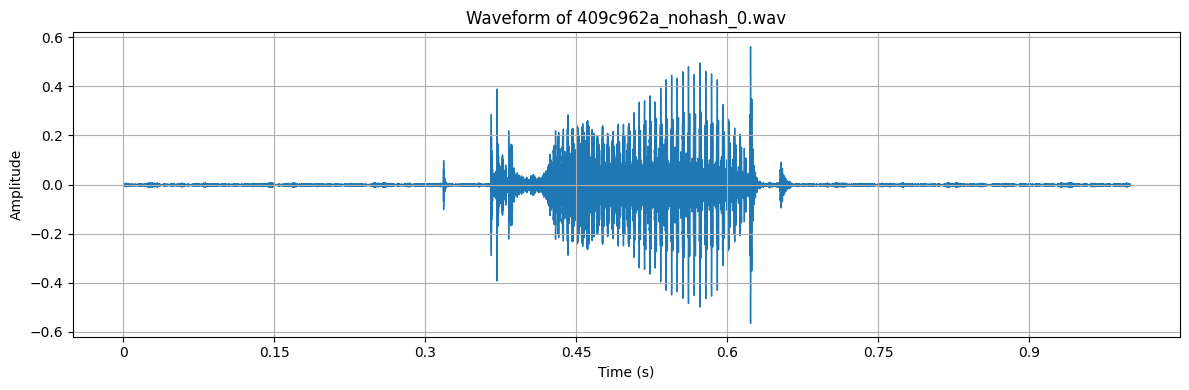

In [3]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform of {sample_audio_filename}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

## Compute and visualize spectrogram

### Subtask:
Calculate and display the spectrogram of a sample audio file to analyze its frequency content.


**Reasoning**:
To calculate and display the spectrogram, I will compute the Short-Time Fourier Transform (STFT) of the audio signal, convert it to decibels, and then use `librosa.display.specshow` to visualize it with appropriate labels and title.



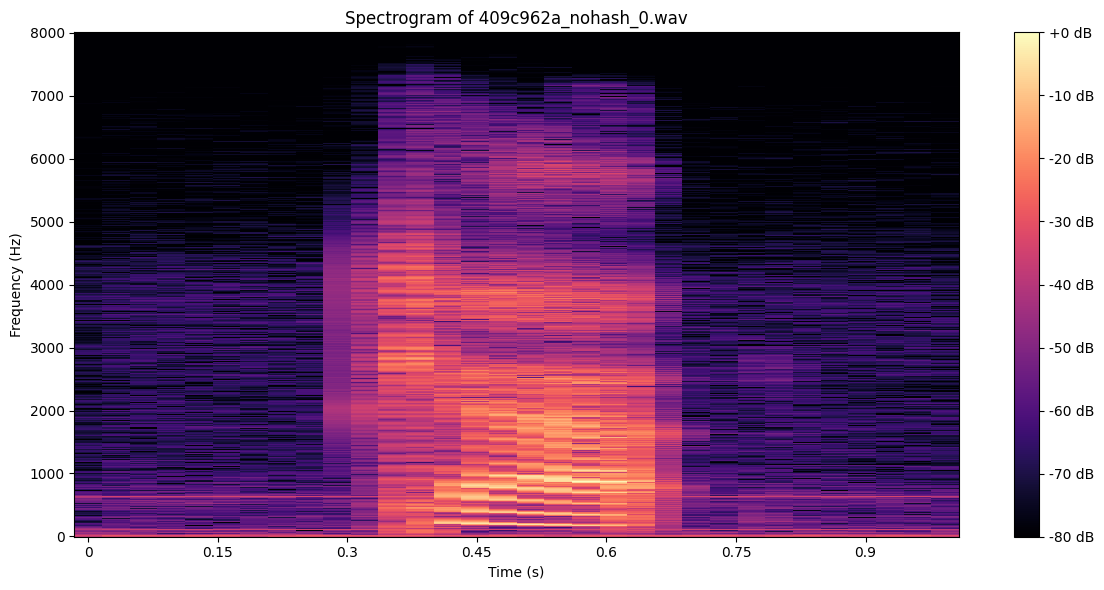

In [4]:
import numpy as np

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convert to decibels for better visualization
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Create a new figure for the plot
plt.figure(figsize=(12, 6))

# Display the magnitude spectrogram
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz')

# Add a color bar
plt.colorbar(format='%+2.0f dB')

# Set the title of the plot
plt.title(f'Spectrogram of {sample_audio_filename}')

# Label the x-axis and y-axis
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Ensure a tight layout and display the plot
plt.tight_layout()
plt.show()

## Extract basic audio features

### Subtask:
Extract features like ZCR (Zero Crossing Rate), RMS (Root Mean Square), and MFCCs (Mel-frequency cepstral coefficients) from a sample audio file.


**Reasoning**:
To extract the specified audio features, I will use `librosa.feature.zero_crossing_rate`, `librosa.feature.rms`, and `librosa.feature.mfcc` on the loaded audio signal `y` and sampling rate `sr`. I will then print the shapes of the extracted features.



In [5]:
import librosa.feature

# Calculate Zero Crossing Rate (ZCR)
zcr = librosa.feature.zero_crossing_rate(y)
print(f"Zero Crossing Rate (ZCR) shape: {zcr.shape}")

# Calculate Root Mean Square (RMS) energy
rms = librosa.feature.rms(y=y)
print(f"Root Mean Square (RMS) shape: {rms.shape}")

# Calculate Mel-frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print(f"MFCCs shape: {mfccs.shape}")

Zero Crossing Rate (ZCR) shape: (1, 32)
Root Mean Square (RMS) shape: (1, 32)
MFCCs shape: (20, 32)


**Reasoning**:
To visualize the extracted audio features, I will plot the Zero Crossing Rate (ZCR) and Root Mean Square (RMS) over time using `matplotlib.pyplot`, making sure to label axes and add a title for clarity.



/tmp/ipython-input-2899866436.py:5: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(zcr[0], sr=sr, x_axis='time') # zcr is usually 2D, but we want the actual values, so zcr[0]
/tmp/ipython-input-2899866436.py:13: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(rms[0], sr=sr, x_axis='time') # rms is usually 2D, but we want the actual values, so rms[0]


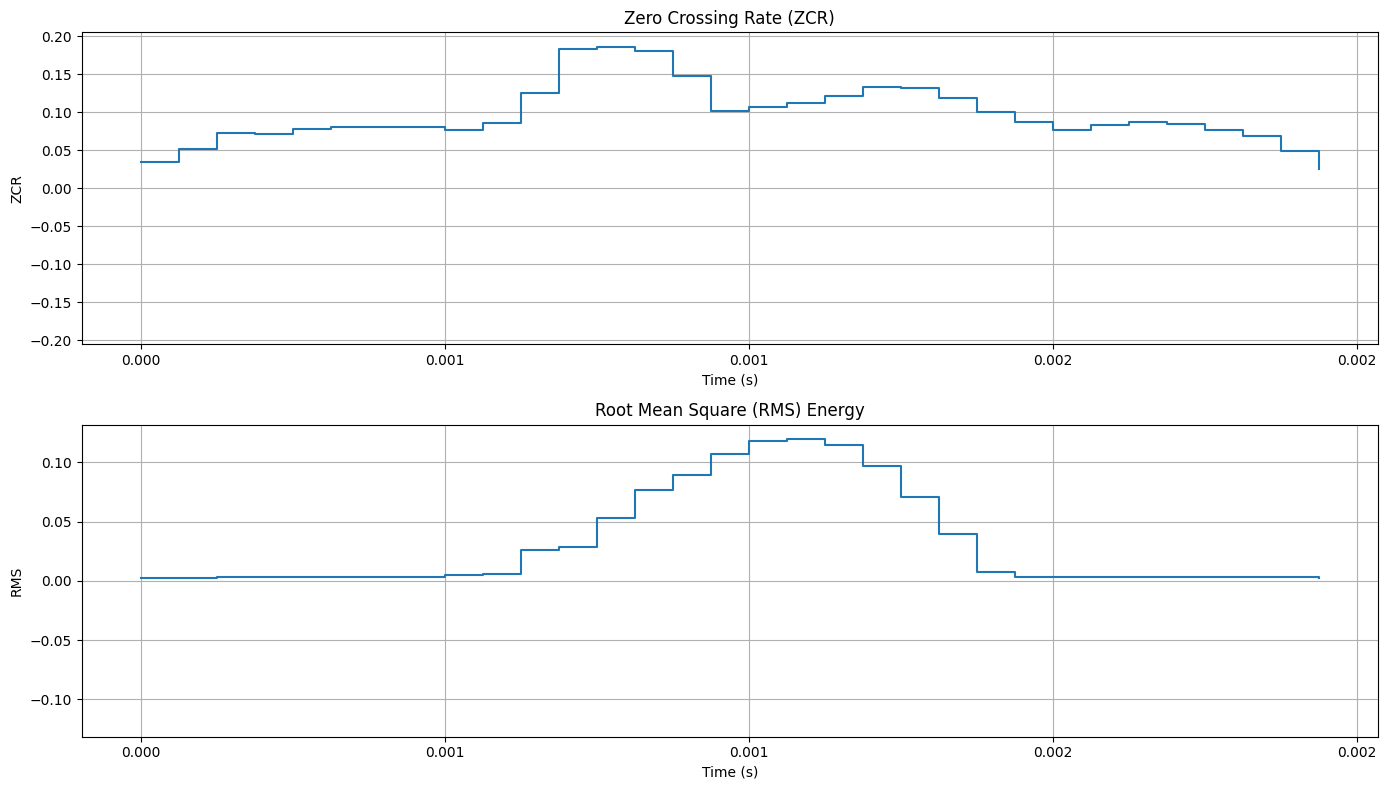

In [6]:
plt.figure(figsize=(14, 8))

# Plot ZCR
plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
librosa.display.waveshow(zcr[0], sr=sr, x_axis='time') # zcr is usually 2D, but we want the actual values, so zcr[0]
plt.title('Zero Crossing Rate (ZCR)')
plt.xlabel('Time (s)')
plt.ylabel('ZCR')
plt.grid(True)

# Plot RMS
plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
librosa.display.waveshow(rms[0], sr=sr, x_axis='time') # rms is usually 2D, but we want the actual values, so rms[0]
plt.title('Root Mean Square (RMS) Energy')
plt.xlabel('Time (s)')
plt.ylabel('RMS')
plt.grid(True)

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` messages because the `x_axis` argument in `librosa.display.waveshow` has been renamed to `axis`. I will update the argument to `axis='time'` to resolve these warnings and ensure compatibility with future versions of the library.



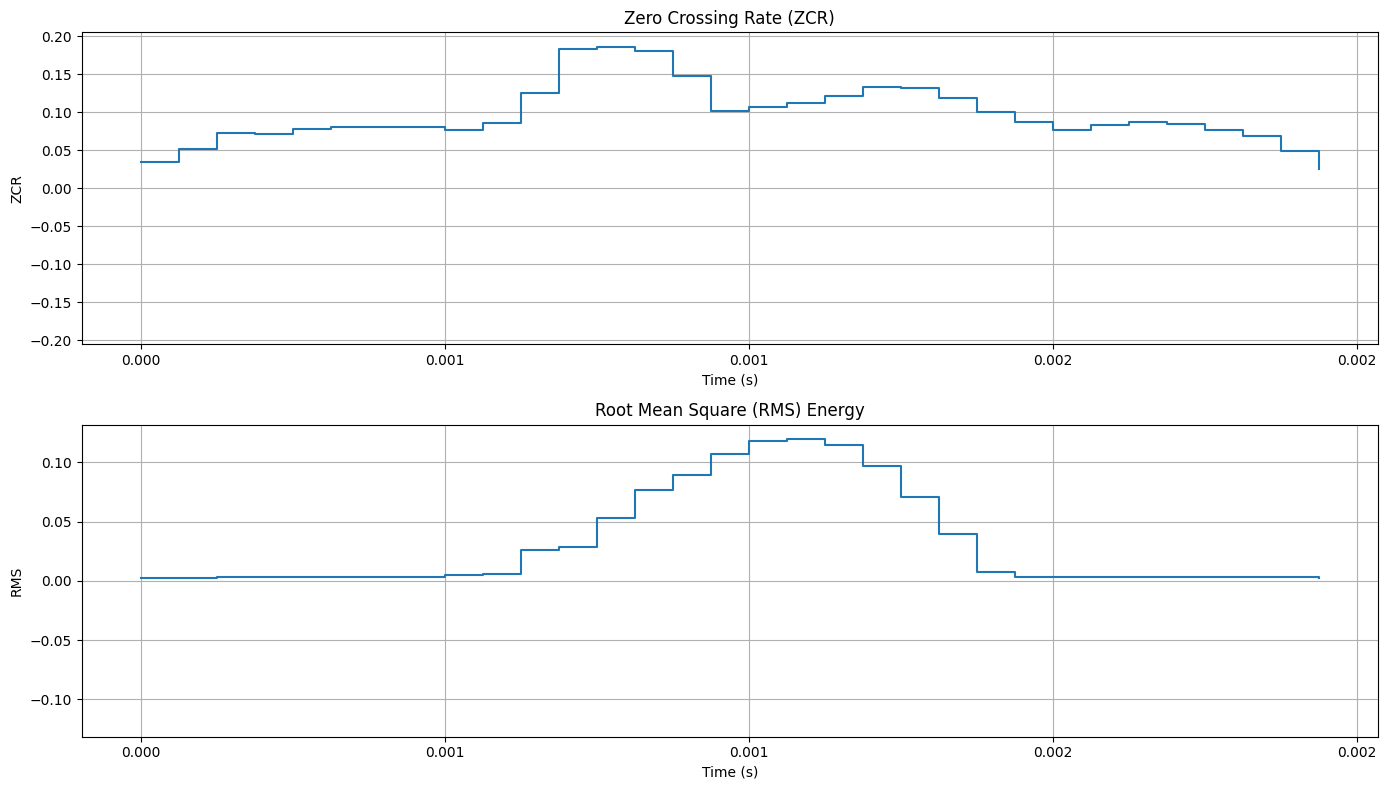

In [7]:
plt.figure(figsize=(14, 8))

# Plot ZCR
plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
librosa.display.waveshow(zcr[0], sr=sr, axis='time') # zcr is usually 2D, but we want the actual values, so zcr[0]
plt.title('Zero Crossing Rate (ZCR)')
plt.xlabel('Time (s)')
plt.ylabel('ZCR')
plt.grid(True)

# Plot RMS
plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
librosa.display.waveshow(rms[0], sr=sr, axis='time') # rms is usually 2D, but we want the actual values, so rms[0]
plt.title('Root Mean Square (RMS) Energy')
plt.xlabel('Time (s)')
plt.ylabel('RMS')
plt.grid(True)

plt.tight_layout()
plt.show()